## Classificador KNN

In [1]:
#### Importando bibliotecas
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
### Importando dados
df = pd.read_excel('economatica.xlsx', skiprows=3, index_col='Código')


#### Tratando os dados

In [3]:
df.columns

Index(['Unnamed: 0', 'Nome', 'Classe', 'Bolsa / Fonte', 'Tipo de Ativo',
       'Ativo /\nCancelado', 'Participação\nno Ibovespa\n\nem %',
       'Segmento listagem\nBovespa', 'Subsetor Bovespa',
       'Data da\nÚlt Cotação', 'Valor de\nMercado\nAtual\nem milhares',
       'Valor de\nMercado\n1 ano atrás\nem milhares',
       'Variação\nValor de Merc\nem 1 ano\nem milhares',
       'Enterprise\nValue\n\nem milhares', 'Fechamento\n\n\nem R$',
       'Máximo do\nFechamento\n52 semanas\nem R$',
       'Fechamento vs\nMáx 52 sem\n\nem %', 'Data do\nMáximo de\n52 semanas',
       'Volume\nno dia\n\nem milhares',
       'Volume Médio\ndiário\n3 meses\nem milhares',
       'Volume vs\nMédia 3 meses\n\nem %', 'Negócios\nno dia\n\nem unidades',
       'Negócios Médio\ndiário\n3 meses\nem unidades',
       'Negócios vs\nMédia 3 meses\n\nem %', 'Retorno\n1 dia\n\nem %',
       'Prêmio vs\nIbovespa\n1 dia\nem dif p.p.', 'Retorno\n1 mês\n\nem %',
       'Prêmio vs\nIbovespa\n1 mês\nem dif p.p.', '

In [4]:
### Linpandao colunas que não serão utilizadas
df.drop(['Unnamed: 0', 'Ativo /\nCancelado', 'Classe', 'Nome','Bolsa / Fonte', 'Tipo de Ativo', 'Setor\nEconomatica', 'Setor NAICS\nult disponiv', 'Subsetor Bovespa', 'Data da\nÚlt Cotação', 'Data do\nÚltimo\nBalanço', 'Consolidado', 'Link da\nÚltima\nNota\nExplicativa', 'Data do\nMáximo de\n52 semanas'], axis=1, inplace=True)

In [5]:
### Configurando o DataFrame
pd.set_option('max_columns', None)
df.head()

,Participação\nno Ibovespa\n\nem %,Segmento listagem\nBovespa,Valor de\nMercado\nAtual\nem milhares,Valor de\nMercado\n1 ano atrás\nem milhares,Variação\nValor de Merc\nem 1 ano\nem milhares,Enterprise\nValue\n\nem milhares,Fechamento\n\n\nem R$,Máximo do\nFechamento\n52 semanas\nem R$,Fechamento vs\nMáx 52 sem\n\nem %,Volume\nno dia\n\nem milhares,Volume Médio\ndiário\n3 meses\nem milhares,Volume vs\nMédia 3 meses\n\nem %,Negócios\nno dia\n\nem unidades,Negócios Médio\ndiário\n3 meses\nem unidades,Negócios vs\nMédia 3 meses\n\nem %,Retorno\n1 dia\n\nem %,Prêmio vs\nIbovespa\n1 dia\nem dif p.p.,Retorno\n1 mês\n\nem %,Prêmio vs\nIbovespa\n1 mês\nem dif p.p.,Retorno\n12 meses\n\nem %,Prêmio vs\nIbovespa\n12 meses\nem dif p.p.,Retorno\n36 meses\n\nem %,Prêmio vs\nIbovespa\n36 meses\nem dif p.p.,Retorno\n60 meses\n\nem %,Prêmio vs\nIbovespa\n60 meses\nem dif p.p.,Retorno\nno Ano\n\nem %,Prêmio vs\nIbovespa\nno Ano\nem dif p.p.,Volatilidade\n12 meses\n\nem %,VAR 95%\np/ 1 dia\n(últ. 12 meses)\nem %,Máx Retorno\nMensal\n(últ. 12 meses)\nem %,Míx Retorno\nMensal\n(últ. 12 meses)\nem %,Meses acima\ndo Ibovespa\n(últ. 12 meses)\nem unidades,Dias acima\ndo Ibovespa\n(últ. 12 meses)\nem %,Sharpe\n12 meses\n\nem unidades,Correlação\n60 meses\nvs IBOV,Beta\n60 meses\nvs IBOV,Dividend Yield\n12 meses\n\nem %,Dividendos e\nJCP por ação\n12 meses\nem R$,P / VPA\n\n\nem vezes,Preço / Lucro\n12 meses\n\nem vezes,Preço / Vendas\n12 meses\n\nem vezes,EV vs\nEBITDA\n12 meses\nem vezes,Dívida\nBruta\n\nem milhares,Dívida\nLíquida\n\nem milhares,Caixa\n\n\nem milhares,EBIT vs\nDívida Bruta\n12 meses\nem %,Dívida Líquida\nvs EBITDA\n12 meses\nem vezes,ROE\n12 meses\n\nem %,ROA\n12 meses\n\nem %,Lucro Líquido\n12 meses\n\nem %,Lucro p/ Ação\n12 meses\n\nem R$,Valor Patrimonial\np/ Ação\n\nem R$,Margem Bruta\n12 meses\n\nem %,Margem Líquida\n12 meses\n\nem %,EBITDA\n12 meses\n\nem milhares,Margem EBITDA\n12 meses\n\nem %,Capex vs\nDepreciação\n12 meses\nem %,Setor Econômico\nBovespa
Código,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VALE3,15.244,Novo Mercado,4.198753e+08,499653332.57,-79778035.509,438885302.06,85.83,106.261816,80.772194,1936133.458,2.033036e+06,95.233598,55749,72092.37500,77.329953,0.210158,0.781494,-0.556135,-6.380009,3.652934,8.954255,138.59735,121.635399,244.370196,177.752953,10.094920,2.408198,34.212326,3.539269,11.451036,-14.714633,6,49.40239,0.123691,0.436322,0.451693,15.026676,14.635983,2.315962,4.580232,1.449556,3.237398,73895677,14838526,59057151,160.924006,0.109455,50.913922,20.083844,95687024,18.739226,37.060195,61.204143,31.391452,135567300,44.83832,219.182501,Materiais básicos
PETR4,6.936,Nível 2,4.518178e+08,382994520.23,68823325.45,720239845.68,33.00,33.88,97.402597,1952570.947,2.134566e+06,91.473899,89273,101028.90625,88.363819,0.609756,1.181093,4.298357,-1.525517,38.706446,44.007767,56.744011,39.782061,180.089549,113.472306,15.992970,8.306248,44.712345,4.498086,13.759526,-8.562691,10,54.98008,1.039984,0.865138,1.581063,19.311274,5.65241,1.166311,3.187308,1.094062,2.577136,324124000,261810000,62314000,68.045254,0.936799,43.444773,13.95245,135054000,10.353566,28.294335,51.073834,34.564239,279473000,71.031389,20.757951,Petróleo gás e biocombustíveis
ITUB4,5.770,Nível 1,2.379411e+08,258834877.37,-20893748.77,-,26.17,26.895843,97.301281,692616.400,8.693269e+05,79.672720,46691,57762.81250,80.832283,0.383583,0.954919,10.779391,4.955517,17.62422,22.925541,0.369429,-16.592522,50.701031,-15.916213,25.108973,17.422250,29.696333,3.067965,21.008869,-6.451091,9,52.589641,0.560644,0.830429,1.02647,3.744805,0.861838,1.770547,10.237991,-,-,-,-,-,-,-,17.291498,1.210562,24988000,2.556165,14.780739,36.633845,17.223576,-,-,-,Financeiro
BBDC4,4.603,Nível 1,1.899835e+08,206543909.57,-16560429.03,-,21.31,27.31969,78.002349,643631.985,9.360013e+05,68.764004,36953,60030.68750,61.556850,0.566305,1.137642,-0.198000,-6.021874,-1.737764,3.563557,-21.732274,-38.694225,38.991637,-27.625606,11.130975,3.444253,32.2375,3.318301,18.802671,-

In [6]:
### Modificando variaves categóricas em numéricas
df = pd.get_dummies(df, columns=['Segmento listagem\nBovespa'])
df.replace('-', np.nan, inplace=True) ### renomeando dados ausentes


In [7]:
### Excluindo linhas em branco
df = df.dropna()
df.isna().sum() ### contando valores nulos

Participação\nno Ibovespa\n\nem %                 0
Valor de\nMercado\nAtual\nem milhares             0
Valor de\nMercado\n1 ano atrás\nem milhares       0
Variação\nValor de Merc\nem 1 ano\nem milhares    0
Enterprise\nValue\n\nem milhares                  0
                                                 ..
Setor Econômico\nBovespa                          0
Segmento listagem\nBovespa_Novo Mercado           0
Segmento listagem\nBovespa_Nível 1                0
Segmento listagem\nBovespa_Nível 2                0
Segmento listagem\nBovespa_Tradicional            0
Length: 61, dtype: int64

In [8]:
### Criando targets
y = df['Setor Econômico\nBovespa'] ### selecionando a coluna de target
y = pd.DataFrame(y)




In [9]:
### Substituindo classes por numeral
le = LabelEncoder()
target = le.fit_transform(y)
y['Target'] = target


C:\Users\Jhona\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
### Criando base de treinamento
X = df.drop(['Setor Econômico\nBovespa'], axis=1) ### excluindo target da base de treinameto X
X.head()

,Participação\nno Ibovespa\n\nem %,Valor de\nMercado\nAtual\nem milhares,Valor de\nMercado\n1 ano atrás\nem milhares,Variação\nValor de Merc\nem 1 ano\nem milhares,Enterprise\nValue\n\nem milhares,Fechamento\n\n\nem R$,Máximo do\nFechamento\n52 semanas\nem R$,Fechamento vs\nMáx 52 sem\n\nem %,Volume\nno dia\n\nem milhares,Volume Médio\ndiário\n3 meses\nem milhares,Volume vs\nMédia 3 meses\n\nem %,Negócios\nno dia\n\nem unidades,Negócios Médio\ndiário\n3 meses\nem unidades,Negócios vs\nMédia 3 meses\n\nem %,Retorno\n1 dia\n\nem %,Prêmio vs\nIbovespa\n1 dia\nem dif p.p.,Retorno\n1 mês\n\nem %,Prêmio vs\nIbovespa\n1 mês\nem dif p.p.,Retorno\n12 meses\n\nem %,Prêmio vs\nIbovespa\n12 meses\nem dif p.p.,Retorno\n36 meses\n\nem %,Prêmio vs\nIbovespa\n36 meses\nem dif p.p.,Retorno\n60 meses\n\nem %,Prêmio vs\nIbovespa\n60 meses\nem dif p.p.,Retorno\nno Ano\n\nem %,Prêmio vs\nIbovespa\nno Ano\nem dif p.p.,Volatilidade\n12 meses\n\nem %,VAR 95%\np/ 1 dia\n(últ. 12 meses)\nem %,Máx Retorno\nMensal\n(últ. 12 meses)\nem %,Míx Retorno\nMensal\n(últ. 12 meses)\nem %,Meses acima\ndo Ibovespa\n(últ. 12 meses)\nem unidades,Dias acima\ndo Ibovespa\n(últ. 12 meses)\nem %,Sharpe\n12 meses\n\nem unidades,Correlação\n60 meses\nvs IBOV,Beta\n60 meses\nvs IBOV,Dividend Yield\n12 meses\n\nem %,Dividendos e\nJCP por ação\n12 meses\nem R$,P / VPA\n\n\nem vezes,Preço / Lucro\n12 meses\n\nem vezes,Preço / Vendas\n12 meses\n\nem vezes,EV vs\nEBITDA\n12 meses\nem vezes,Dívida\nBruta\n\nem milhares,Dívida\nLíquida\n\nem milhares,Caixa\n\n\nem milhares,EBIT vs\nDívida Bruta\n12 meses\nem %,Dívida Líquida\nvs EBITDA\n12 meses\nem vezes,ROE\n12 meses\n\nem %,ROA\n12 meses\n\nem %,Lucro Líquido\n12 meses\n\nem %,Lucro p/ Ação\n12 meses\n\nem R$,Valor Patrimonial\np/ Ação\n\nem R$,Margem Bruta\n12 meses\n\nem %,Margem Líquida\n12 meses\n\nem %,EBITDA\n12 meses\n\nem milhares,Margem EBITDA\n12 meses\n\nem %,Capex vs\nDepreciação\n12 meses\nem %,Segmento listagem\nBovespa_Novo Mercado,Segmento listagem\nBovespa_Nível 1,Segmento listagem\nBovespa_Nível 2,Segmento listagem\nBovespa_Tradicional
Código,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VALE3,15.244,4.198753e+08,4.996533e+08,-7.977804e+07,4.388853e+08,85.83,106.261816,80.772194,1936133.458,2.033036e+06,95.233598,55749,72092.375000,77.329953,0.210158,0.781494,-0.556135,-6.380009,3.652934,8.954255,138.597350,121.635399,244.370196,177.752953,10.094920,2.408198,34.212326,3.539269,11.451036,-14.714633,6.0,49.402390,0.123691,0.436322,0.451693,15.026676,14.635983,2.315962,4.580232,1.449556,3.237398,73895677.0,14838526.0,59057151.0,160.924006,0.109455,50.913922,20.083844,95687024.0,18.739226,37.060195,61.204143,31.391452,135567300.0,44.838320,219.182501,1,0,0,0
PETR4,6.936,4.518178e+08,3.829945e+08,6.882333e+07,7.202398e+08,33.00,33.880000,97.402597,1952570.947,2.134566e+06,91.473899,89273,101028.906250,88.363819,0.609756,1.181093,4.298357,-1.525517,38.706446,44.007767,56.744011,39.782061,180.089549,113.472306,15.992970,8.306248,44.712345,4.498086,13.759526,-8.562691,10.0,54.980080,1.039984,0.865138,1.581063,19.311274,5.652410,1.166311,3.187308,1.094062,2.577136,324124000.0,261810000.0,62314000.0,68.045254,0.936799,43.444773,13.952450,135054000.0,10.353566,28.294335,51.073834,34.564239,279473000.0,71.031389,20.757951,0,0,1,0
PETR3,4.519,4.518178e+08,3.829945e+08,6.882333e+07,7.202398e+08,35.87,37.200000,96.424731,501795.102,6.711942e+05,74.761539,27983,35158.781250,79.590358,-0.637119,-0.065782,3.760486,-2.063388,49.327089,54.628410,47.088495,30.126544,172.611197,105.993954,16.840391,9.153668,43.904703,4.429803,15.367965,-9.210961,10.0,54.980080,1.304583,0.852929,1.641445,19.206286,5.652410,1.267745,3.464507,1.189212,2.577136,324124000.0,261810000.0,62314000.0,68.045254,0.936799,43.444773,13.952450,135054000.0,10.353566,28.294335,51.073834,34.564239,279473000.0,71.031389,20.757951,0,0,1,0
B3SA3,3.988,8.665946e+07,1.180229e+08,-3.136341e+07,7.664813e+07,14.27,17.798042,80.177360,531130.632,5.130334e+05,1

#### Criando base de teste

In [11]:
### Selecionando a última linha como teste
y_test = y[-1:]
X_test = X[-1:]

#### EDA

In [28]:
### Gráfico de EDA
_ = pd.plotting.scatter_matrix(X, c = y['Target'], s=150, marker='D', figsize=[20, 20])

#### Rodando modelo de classificação

In [13]:
### Base de treinamento
X_train = X[:-1].values
y_train = y['Setor Econômico\nBovespa'][:-1].values

In [14]:
### Treinando dados
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [15]:
### Previsão
y_predic = knn.predict(X_test)


C:\Users\Jhona\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [16]:
print('Setor: {}'.format(y_predic))

Setor: ['Consumo cíclico']


# Testando a acurácia do modelo

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y['Setor Econômico\nBovespa'].values, test_size= 0.2, random_state=42)

In [19]:
nb = np.arange(1, 15) ### valores a serem testados
train_accuracy = np.empty(len(nb))
test_accuracy = np.empty(len(nb))

In [20]:
for i, k in enumerate(nb):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    ### Testando a acurácia nos dados de teste
    train_accuracy[i] = knn.score(X_train, y_train)
    ### Testando a acurácia nos dados de treino
    test_accuracy[i] = knn.score(X_test, y_test)

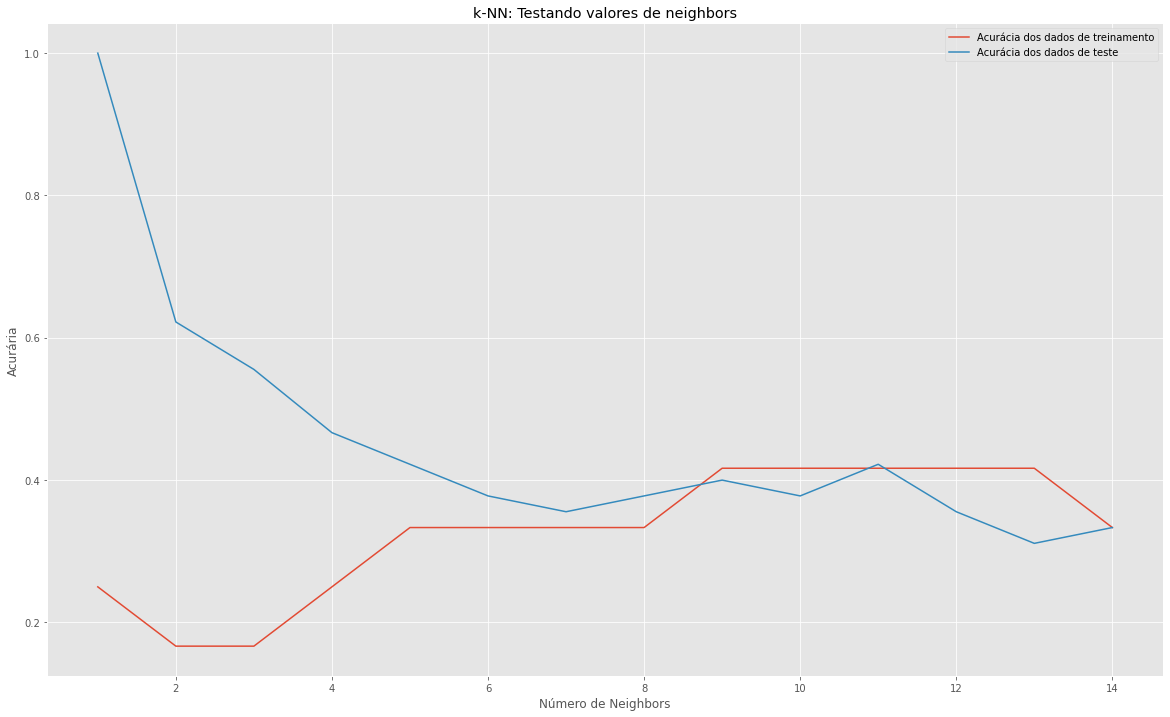

In [21]:
plt.style.use('ggplot')
plt.figure(figsize=[20,12])
plt.title('k-NN: Testando valores de neighbors')
plt.plot(nb, test_accuracy, label = 'Acurácia dos dados de treinamento')
plt.plot(nb, train_accuracy, label = 'Acurácia dos dados de teste')
plt.legend()
plt.xlabel('Número de Neighbors')
plt.ylabel('Acurária')
plt.show()

#### Matriz de confusão

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [26]:
y_pred = knn.predict(X_test) ### Valor previsto

array(['Consumo não cíclico', 'Utilidade pública', 'Utilidade pública',
       'Utilidade pública', 'Materiais básicos', 'Consumo cíclico',
       'Utilidade pública', 'Utilidade pública', 'Consumo cíclico',
       'Utilidade pública', 'Consumo cíclico', 'Consumo cíclico'],
      dtype=object)

In [27]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 1 0 0 0 0]
 [0 2 0 0 0 0 1]
 [0 0 0 0 1 0 3]]


                     precision    recall  f1-score   support

       Comunicações       0.00      0.00      0.00         1
    Consumo cíclico       0.25      1.00      0.40         1
Consumo não cíclico       0.00      0.00      0.00         0
         Financeiro       0.00      0.00      0.00         2
  Materiais básicos       0.00      0.00      0.00         1
              Saúde       0.00      0.00      0.00         3
  Utilidade pública       0.50      0.75      0.60         4

           accuracy                           0.33        12
          macro avg       0.11      0.25      0.14        12
       weighted avg       0.19      0.33      0.23        12



C:\Users\Jhona\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jhona\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jhona\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie